In [1]:
import os
import json
import csv
import glob
import datetime
import requests
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

In [2]:
atl_df = pd.read_csv("atl.csv")

atl_df.head()

,Crime,UCR Code,Month,Day,Year,Latitude,Longitude
0,Larceny-Non Vehicle,630,1,1,2009,33.68845,-84.49328
1,Larceny-Non Vehicle,630,1,1,2009,33.75320,-84.39201
2,Larceny-Non Vehicle,630,1,1,2009,33.75735,-84.50282
3,Larceny-Non Vehicle,630,1,1,2009,33.84676,-84.36212
4,Larceny-Non Vehicle,630,1,1,2009,33.68677,-84.49773


In [3]:
atl_backup_df = atl_df
atl_df.Crime.value_counts()

Larceny-From Vehicle    101948
Larceny-Non Vehicle      79631
Burglary-Residence       48927
Auto Theft               46078
Agg Assault              24374
Robbery-Pedestrian       16927
Burglary-Nonres          10697
Robbery-Commercial        2263
Robbery-Residence         2194
Homicide                   947
Manslaughter                17
Name: Crime, dtype: int64

In [4]:
atl_combined_crime = atl_df.replace({
    "Larceny-From Vehicle" : "Theft",
    "Larceny-Non Vehicle" : "Theft",
    "Burglary-Residence": "Burglary",
    "Burglary-Nonres": "Burglary",
    "Robbery-Pedestrian" : "Robbery",
    "Robbery-Commercial" : "Robbery",
    "Robbery-Residence" : "Robbery",
    "Agg Assault" : "Aggrivated Assault",
    "Auto Theft" : "Grand Theft Auto"})
atl_combined_crime.Crime.value_counts()
atl_df = atl_combined_crime
atl_df.Crime.value_counts()

Theft                 181579
Burglary               59624
Grand Theft Auto       46078
Aggrivated Assault     24374
Robbery                21384
Homicide                 947
Manslaughter              17
Name: Crime, dtype: int64

In [5]:
atl_short_df = atl_df.loc[:,["Crime", "Year"]]

atl_years = atl_short_df['Year'].unique()
atl_theft = atl_short_df[(atl_short_df['Crime'] == 'Theft') & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_burglary = atl_short_df[(atl_short_df['Crime'] == 'Burglary')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_auto = atl_short_df[(atl_short_df['Crime'] == 'Grand Theft Auto')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_robbery = atl_short_df[(atl_short_df['Crime'] == 'Robbery')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_aassault = atl_short_df[(atl_short_df['Crime'] == 'Aggrivated Assault')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_homicide = atl_short_df[(atl_short_df['Crime'] == 'Homicide')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_manslaughter = atl_short_df[(atl_short_df['Crime'] == 'Manslaughter')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()

atl_crime_df = pd.DataFrame({
    "Theft" : atl_theft,
    "Burglary" : atl_burglary,
    "Grand Theft Auto" : atl_auto,
    "Robbery" : atl_robbery,
    "Aggrivated Assault" : atl_aassault,
    "Homicide" : atl_homicide,
    "Manslaughter" : atl_manslaughter
})

atl_crime_df.fillna(0).style.format("{:,}")

,Theft,Burglary,Grand Theft Auto,Robbery,Aggrivated Assault,Homicide,Manslaughter
Year,,,,,,,
2009,"19,288","9,083","5,647","2,683","2,616",78,1.0
2010,"17,674","7,994","4,975","2,158","2,610",89,2.0
2011,"17,323","7,396","5,219","2,313","2,536",84,4.0
2012,"17,286","6,157","5,098","2,262","2,520",82,3.0
2013,"17,270","5,962","4,483","2,368","2,275",81,1.0
2014,"16,813","5,490","4,133","2,368","2,240",88,1.0
2015,"16,643","4,791","4,250","2,159","2,157",87,2.0
2016,"16,550","4,397","3,848","1,916","2,196",115,0.0
2017,"16,274","3,398","3,202","1,417","2,035",84,1.0


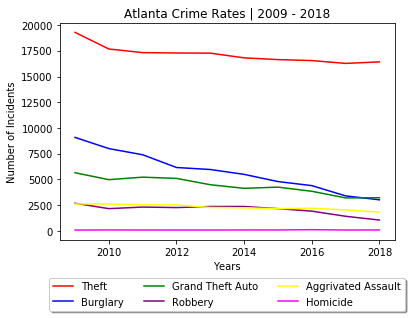

In [6]:
# Atlanta by year graph
x_axis = range(2009, 2019)
theft, = plt.plot(x_axis, atl_theft , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault, color="yellow", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, atl_homicide, color="magenta", label="Homicide")

#Add labels to graph
plt.title("Atlanta Crime Rates | 2009 - 2018")
plt.xlabel("Years")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
plt.savefig("images/ATLYears.png")

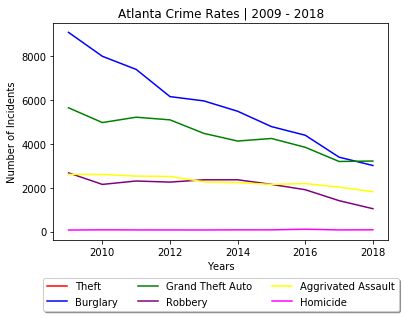

In [7]:
# Atlanta by year graph
x_axis = range(2009, 2019)
# theft, = plt.plot(x_axis, atl_theft , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault, color="yellow", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, atl_homicide, color="magenta", label="Homicide")

#Add labels to graph
plt.title("Atlanta Crime Rates | 2009 - 2018")
plt.xlabel("Years")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
plt.savefig("images/ATLYearsZoom.png")

In [ ]:
atl_month_df = atl_df.loc[:,["Crime", "Month", "Year"]]
atl_years = atl_month_df['Year'].unique()
atl_theft = atl_month_df[(atl_month_df.Crime == 'Theft') & (atl_month_df.Year == 2019) & (atl_month_df.Month < 3)].groupby('Year')['Crime'].count()
atl_burglary = atl_month_df[(atl_month_df.Crime == 'Burglary')  & (atl_month_df.Year == 2019) & (atl_month_df.Month < 3)].groupby('Year')['Crime'].count()
atl_auto = atl_month_df[(atl_month_df.Crime == 'Grand Theft Auto')  & (atl_month_df.Year == 2019) & (atl_month_df.Month < 3)].groupby('Year')['Crime'].count()
atl_robbery = atl_month_df[(atl_month_df.Crime == 'Robbery')  & (atl_month_df.Year == 2019) & (atl_month_df.Month < 3)].groupby('Year')['Crime'].count()
atl_aassault = atl_month_df[(atl_month_df.Crime == 'Aggrivated Assault')  & (atl_month_df.Year == 2019) & (atl_month_df.Month < 3)].groupby('Year')['Crime'].count()
atl_homicide = atl_month_df[(atl_month_df.Crime == 'Homicide')  & (atl_month_df == 2019) & (atl_month_df.Month < 3)].groupby('Year')['Crime'].count()
atl_manslaughter = atl_month_df[(atl_month_df.Crime == 'Manslaughter')  & (atl_month_df.Year == 2019) & (atl_month_df.Month < 3)].groupby('Year')['Crime'].count()

atl_crime_2019_df = pd.DataFrame({
    "Theft" : atl_theft,
    "Burglary" : atl_burglary,
    "Grand Theft Auto" : atl_auto,
    "Robbery" : atl_robbery,
    "Aggrivated Assault" : atl_aassault,
    "Homicide" : atl_homicide,
    "Manslaughter" : atl_manslaughter
})

atl_crime_2019_df.head()